Definição do problema

Base de dados:
Input (X): Temperatura
Output (Y): Lucro diário em dólares

Etapa 1: Importação das bibliotecas

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print(tf.__version__)


2.16.1


Etapa 2: Importação da base de dados


In [9]:
sales_df = pd.read_csv('SalesData.csv')

In [10]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [11]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [12]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Etapa 3: Visualização da base de dados

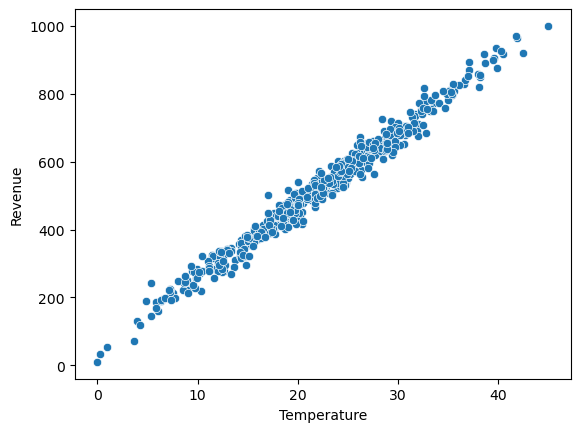

In [14]:
sns.scatterplot(x=sales_df['Temperature'], y=sales_df['Revenue'])
plt.show()


Etapa 4: Criação das variáveis da base de dados

In [15]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [16]:
X_train.shape

(500,)

Etapa 5: Criação e construção do modelo

In [17]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))
model.add(tf.keras.layers.Dense(units = 1))

C:\Users\ppeli\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [20]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 220496.3594
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16892.7852
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5421.0801 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1813.6368 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 671.7910 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 689.2349 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 704.0548 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 790.5370  
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 626.8378 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 588.2517 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 734.8795 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 611.5508 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 694.5072 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 635.5015 
Epoch 15/

Etapa 6: Avaliação do modelo

In [21]:
epochs_hist.history.keys()

dict_keys(['loss'])

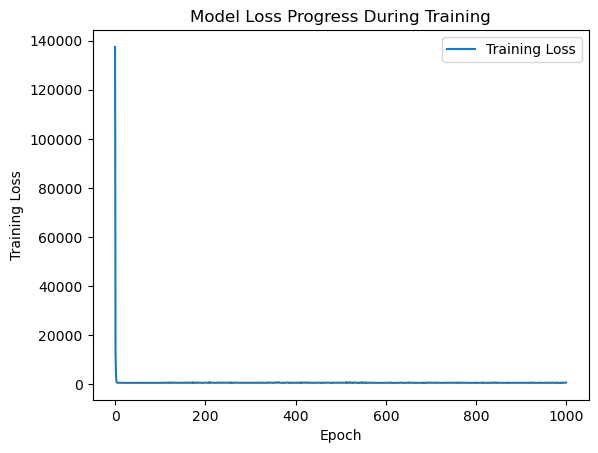

In [24]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [23]:
model.get_weights()

[array([[-0.01810981, -3.310829  , -0.07192847, -0.00632272,  0.12111076,
          0.07768564,  3.1756084 , -0.15746835, -0.02899189, -0.1296264 ]],
       dtype=float32),
 array([ 0.36442018, -5.1556745 ,  1.8835264 ,  0.5346215 ,  0.4171433 ,
         0.23907839,  4.9514112 , -0.5069738 ,  0.09523116,  0.0912978 ],
       dtype=float32),
 array([[-0.00616765],
        [-3.4490576 ],
        [-0.0058591 ],
        [-0.084076  ],
        [ 0.19777916],
        [-0.05206247],
        [ 3.2219331 ],
        [-0.11409935],
        [-0.43213227],
        [-0.35553092]], dtype=float32),
 array([10.992408], dtype=float32)]

In [26]:
# Previsões com o modelo treinado
temp = 5
temp_array = np.array([[temp]])  # Converter a entrada em um array NumPy 2D
revenue = model.predict(temp_array)
print('Revenue Predictions Using Trained ANN =', revenue)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Revenue Predictions Using Trained ANN = [[153.46574]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


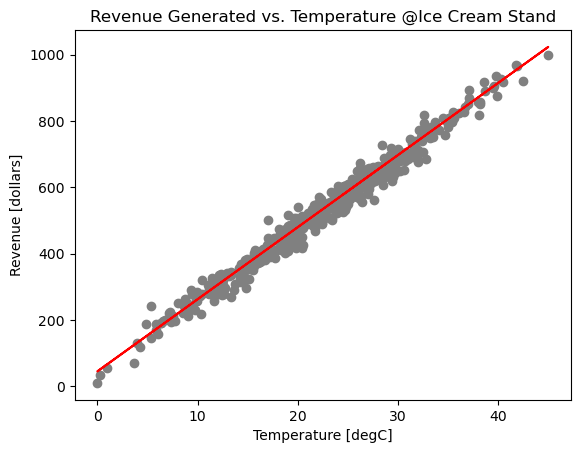

In [27]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [ ]:
Etapa 7: Confirmar os resultados usando sklearn

In [28]:
X_train.shape

(500,)

In [29]:
X_train = X_train.values.reshape(-1,1)

In [30]:
X_train.shape

(500, 1)

In [31]:
y_train = y_train.values.reshape(-1,1)

In [32]:
y_train.shape

(500, 1)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
regressor.coef_

array([[21.44362551]])

In [35]:
regressor.intercept_

array([44.83126709])

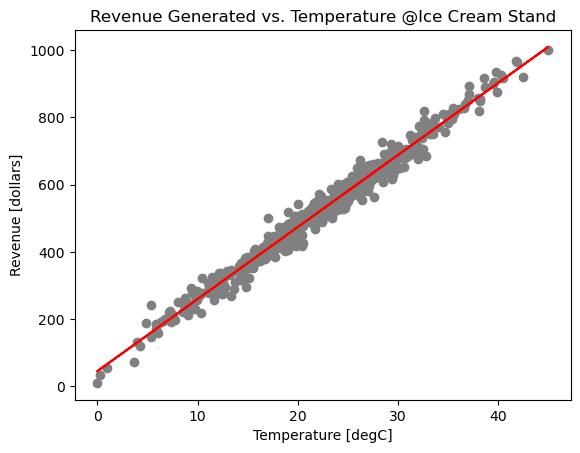

In [36]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [37]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
